In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
def Q_factor_to_dataframe(dfin, tan_ma, tan_ms, tan_sa, tan_substrate, mode = "elmer"):
    df = dfin.copy()
    if mode == "elmer":
        df['1/Q_MA_fixed'] = df['p_MA_fixed']*tan_ma
        df['1/Q_MS_fixed'] = df['p_MS_fixed']*tan_ms
        df['1/Q_SA_fixed'] = df['p_SA_fixed']*tan_sa
        df['1/Q_substrate_fixed'] = df['p_substrate_fixed']*tan_substrate
    else:
        df['1/Q_MA_fixed'] = df['p_1t1_layerMA']*tan_ma
        df['1/Q_MS_fixed'] = df['p_1t1_layerMS']*tan_ms
        df['1/Q_SA_fixed'] = df['p_1t1_layerSA']*tan_sa
        df['1/Q_substrate_fixed'] = df['p_substrate']*tan_substrate
    df['1/Q'] = df['1/Q_MA_fixed'] + df['1/Q_MS_fixed'] + df['1/Q_SA_fixed'] + df['1/Q_substrate_fixed']
    df['Q_MA_fixed'] = 1./df['1/Q_MA_fixed']
    df['Q_MS_fixed'] = 1./df['1/Q_MS_fixed']
    df['Q_SA_fixed'] = 1./df['1/Q_SA_fixed']
    df['Q_substrate_fixed'] = 1./df['1/Q_substrate_fixed']
    df['Q'] = 1./df['1/Q']
    df['tan_ma']=tan_ma
    df['tan_ms']=tan_ms
    df['tan_sa']=tan_sa
    df['tan_substrate']=tan_substrate
    return df

In [25]:
eigenmode_paths=[
    'libraries/swissmon_epr_output_epr.csv',
    'libraries/swissmon_eigenmode_no_cplr_epr.csv',
    'libraries/swissmon_eigenmode_with_cplr_epr.csv',
]
names = [
    'swissmon',
    'swissmon',
    'swissmon',
]
mode = [
    "none",
    "elmer",
    "elmer"
]

In [26]:
# For Nb:
# ma_vals = [9.9e-3, 9.9e-3, 9.9e-3, 3.5e-3, 3.5e-3,]
# ms_vals = [2.6e-3, 3.5e-4, 3.5e-4, 2.7e-4, 2.7e-4]
# sa_vals = [2.1e-3, 1.7e-3, 1.7e-3, 1.0e-3, 1.0e-3]
# Let's have a naive approach for now
ma_vals = [9.9e-3]
ms_vals = [3.5e-4]
sa_vals = [1.7e-3]

substrate_vals = [1.3e-7]
case_names = [f"ms:{ms}, ma:{ma}, sa:{sa}, substrate:{substrate}"
              for ms, ma, sa, substrate in zip(ms_vals, ma_vals, sa_vals, substrate_vals)]


dfs = []
for i_tan in range(len(ma_vals)):
    for i, epath in enumerate(eigenmode_paths):
        df = pd.read_csv(epath)
        df['case']=df.index*0+i_tan
        dfs.append(Q_factor_to_dataframe(df, ma_vals[i_tan], ms_vals[i_tan], sa_vals[i_tan], substrate_vals[i_tan], mode[i]))

df = pd.concat(dfs)

In [27]:
f = 5.7e9
omega = 2.*np.pi*f
df['T1']=df['Q']/omega*1e6
df['T1']

0    25.893441
0    14.390873
0    14.470756
Name: T1, dtype: float64

In [28]:
xmon_ma_simple = df.iloc[0]["p_1t1_layerMA"]
xmon_sa_simple = df.iloc[0]["p_1t1_layerSA"]
xmon_ms_simple = df.iloc[0]["p_1t1_layerMS"]
xmon_substrate_simple = df.iloc[0]["p_substrate"]
xmon_air_simple = df.iloc[0]["p_vacuum"]

xmon_ma_mer = df.iloc[1]["p_MA_fixed"]
xmon_sa_mer = df.iloc[1]["p_SA_fixed"]
xmon_ms_mer = df.iloc[1]["p_MS_fixed"]
xmon_substrate_mer = df.iloc[1]["p_substrate_fixed"]
xmon_air_mer = df.iloc[1]["p_vacuum_fixed"]

xmon_ma_mer_cplr = df.iloc[2]["p_MA_fixed"]
xmon_sa_mer_cplr = df.iloc[2]["p_SA_fixed"]
xmon_ms_mer_cplr = df.iloc[2]["p_MS_fixed"]
xmon_substrate_mer_cplr = df.iloc[2]["p_substrate_fixed"]
xmon_air_mer_cplr = df.iloc[2]["p_vacuum_fixed"]

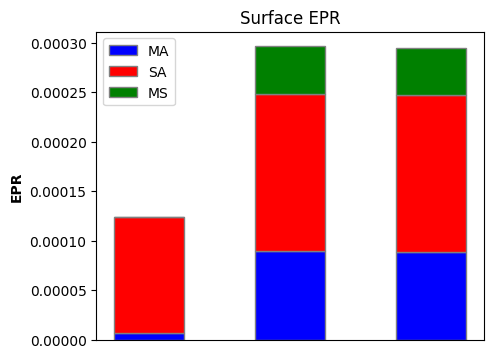

In [29]:
simple = [xmon_ma_simple, xmon_sa_simple, xmon_ms_simple]
mer = [xmon_ma_mer, xmon_sa_mer, xmon_ms_mer]
mer_cplr = [xmon_ma_mer_cplr, xmon_sa_mer_cplr, xmon_ms_mer_cplr]

# Data for plotting
categories = ['simple', 'mer', 'mer_cplr']
MA = [simple[0], mer[0], mer_cplr[0]]
SA = [simple[1], mer[1], mer_cplr[1]]
MS = [simple[2], mer[2], mer_cplr[2]]

# Create the plot
fig, ax = plt.subplots()
fig.set_size_inches(5, 4)  
bar_width = 0.5
r1 = range(len(categories))

ax.bar(r1, MA, color='b', edgecolor='grey', width=bar_width, label='MA')
ax.bar(r1, SA, bottom=MA, color='r', edgecolor='grey', width=bar_width, label='SA')
ax.bar(r1, MS, bottom=[i+j for i,j in zip(MA, SA)], color='g', edgecolor='grey', width=bar_width, label='MS')

# ax.set_xlabel('Categories', fontweight='bold')
ax.set_ylabel('EPR', fontweight='bold')
ax.set_title('Surface EPR')
ax.set_xticks([])
# ax.set_xticklabels(categories)
ax.legend()
plt.savefig("surface_loss.svg", bbox_inches = "tight")
plt.show()

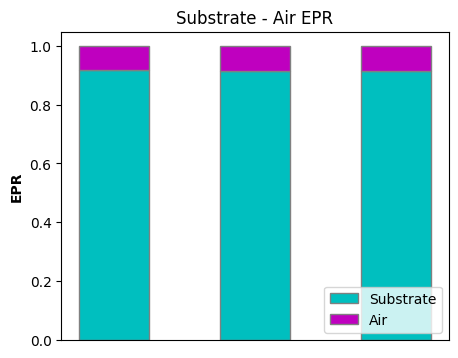

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 4)  # Adjust the width and height as needed

categories = ['simple', 'mer', 'mer_cplr']
substrate = [xmon_substrate_simple, xmon_substrate_mer, xmon_substrate_mer_cplr]
air = [xmon_air_simple, xmon_air_mer, xmon_air_mer_cplr]

bar_width = 0.5
r1 = range(len(categories))

ax.bar(r1, substrate, color='c', edgecolor='grey', width=bar_width, label='Substrate')
ax.bar(r1, air, bottom=substrate, color='m', edgecolor='grey', width=bar_width, label='Air')

# ax.set_xlabel('Categories', fontweight='bold')
ax.set_ylabel('EPR', fontweight='bold')
ax.set_title('Substrate - Air EPR')
ax.set_xticks([])
# ax.set_xticklabels(categories)
ax.legend(loc='lower right') 
plt.savefig("bulk_loss.svg", bbox_inches = "tight")

plt.show()


In [31]:
sa_3_default = df.iloc[2]["p_SA_default_fixed"] 
sa_3_cplr = df.iloc[2]["p_SA_cplr_fixed"]
ma_3_default = df.iloc[2]["p_MA_default_fixed"] 
ma_3_cplr = df.iloc[2]["p_MA_cplr_fixed"]
ms_3_default = df.iloc[2]["p_MS_default_fixed"] 
ms_3_cplr = df.iloc[2]["p_MS_cplr_fixed"]

sa_2 = df.iloc[1]["p_SA_default_fixed"] 
ma_2 = df.iloc[1]["p_MA_default_fixed"] 
ms_2 = df.iloc[1]["p_MS_default_fixed"]

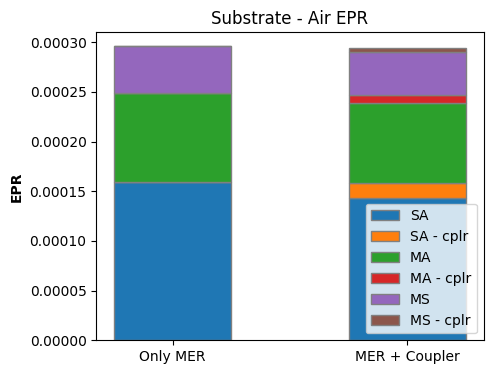

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 4)  # Adjust the width and height as needed

categories = ['Only MER', 'MER + Coupler']
sa = [sa_2, sa_3_default]
sa_cplr = [0, sa_3_cplr]
ma = [ma_2, ma_3_default]
ma_cplr = [0, ma_3_cplr]
ms = [ms_2, ms_3_default]
ms_cplr = [0, ms_3_cplr]

bar_width = 0.5
r1 = range(len(categories))

ax.bar(r1, sa, edgecolor='grey', width=bar_width, label='SA')
ax.bar(r1, sa_cplr, bottom=sa, edgecolor='grey', width=bar_width, label='SA - cplr')

# Correctly accumulate the bottom values for each subsequent bar
ma_bottom = [i + j for i, j in zip(sa, sa_cplr)]
ax.bar(r1, ma, bottom=ma_bottom, edgecolor='grey', width=bar_width, label='MA')

ma_cplr_bottom = [i + j for i, j in zip(ma_bottom, ma)]
ax.bar(r1, ma_cplr, bottom=ma_cplr_bottom, edgecolor='grey', width=bar_width, label='MA - cplr')

ms_bottom = [i + j for i, j in zip(ma_cplr_bottom, ma_cplr)]
ax.bar(r1, ms, bottom=ms_bottom, edgecolor='grey', width=bar_width, label='MS')

ms_cplr_bottom = [i + j for i, j in zip(ms_bottom, ms)]
ax.bar(r1, ms_cplr, bottom=ms_cplr_bottom, edgecolor='grey', width=bar_width, label='MS - cplr')

# ax.set_xlabel('Categories', fontweight='bold')
ax.set_ylabel('EPR', fontweight='bold')
ax.set_title('Substrate - Air EPR')
ax.set_xticks(r1)
ax.set_xticklabels(categories)
ax.legend(loc='lower right')
ax.set_ylim([0, 0.00031])
plt.savefig("MER_comparison.svg", bbox_inches = "tight")
plt.show()
